In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('../dataset/Dataset_IoV.xlsx')  # Replace with your dataset path

# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [2]:
print(X_train.shape)

(165420, 1, 6)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Design the LSTM model
model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
4136/4136 [==============================] - 82s 16ms/step - loss: 0.0463 - accuracy: 0.9783 - val_loss: 2.6846e-04 - val_accuracy: 1.0000
Epoch 2/5
4136/4136 [==============================] - 66s 16ms/step - loss: 6.9349e-04 - accuracy: 0.9998 - val_loss: 1.6262e-04 - val_accuracy: 1.0000
Epoch 3/5
4136/4136 [==============================] - 66s 16ms/step - loss: 4.5935e-04 - accuracy: 0.9998 - val_loss: 3.1338e-04 - val_accuracy: 1.0000
Epoch 4/5
4136/4136 [==============================] - 93s 22ms/step - loss: 4.1530e-04 - accuracy: 0.9998 - val_loss: 1.9789e-04 - val_accuracy: 1.0000
Epoch 5/5
4136/4136 [==============================] - 73s 18ms/step - loss: 3.7126e-04 - accuracy: 0.9999 - val_loss: 5.7853e-05 - val_accuracy: 1.0000


In [5]:
import numpy as np

# Set numpy to display full float numbers
np.set_printoptions(suppress=True, precision=10)

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

1293/1293 [==============================] - 14s 10ms/step - loss: 2.5752e-06 - accuracy: 1.0000
Test Accuracy: 1.00


In [7]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')

1293/1293 [==============================] - 7s 5ms/step
Mean Squared Error (MSE): 0.0000001784542817
Root Mean Squared Error (RMSE): 0.0004224384945742


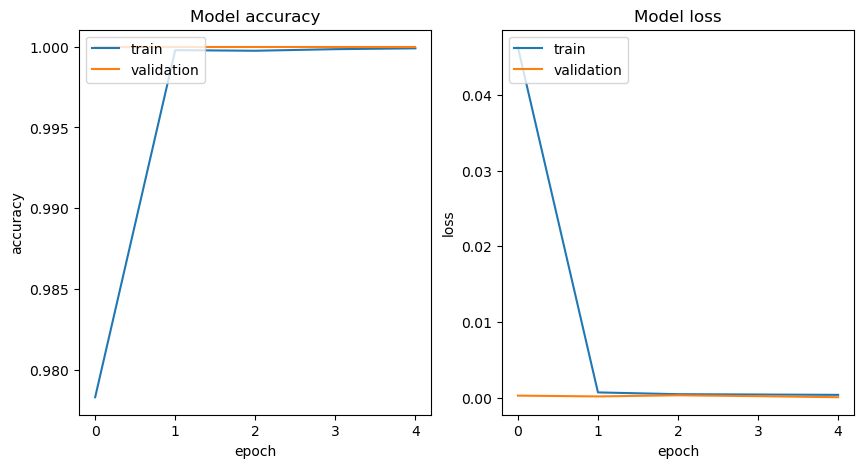

In [8]:
#visualizing the loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
